linkdata:  https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data
People

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

Promotion

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

ID: Mã định danh duy nhất của khách hàng

Year_Birth: Năm sinh của khách hàng

Học vấn: Trình độ học vấn của khách hàng

Marital_Status: Tình trạng hôn nhân của khách hàng

Thu nhập: Thu nhập hộ gia đình hàng năm của khách hàng

Kidhome: Số trẻ em trong hộ gia đình khách hàng

Teenhome: Số thanh thiếu niên trong hộ gia đình khách hàng

Dt_Customer: Ngày khách hàng đăng ký vào công ty

Recencyy: Số ngày kể từ lần mua hàng cuối cùng của khách hàng

Complain : 1 nếu khách hàng phàn nàn trong 2 năm qua, 0 nếu ngược lại

Các sản phẩm

MntWines: Số tiền chi cho rượu vang trong 2 năm qua

MntFruits: Số tiền chi cho trái cây trong 2 năm qua

MntMeatProducts: Số tiền chi cho thịt trong 2 năm qua

MntFishProducts: Số tiền chi cho cá trong 2 năm qua

MntSweetProducts: Số tiền chi cho đồ ngọt trong 2 năm qua

MntGoldProds: Số tiền chi cho vàng trong 2 năm qua

Khuyến mãi

NumDealsPurchases: Số lần mua hàng được giảm giá

AcceptedCmp1: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch đầu tiên, 0 nếu không

AcceptedCmp2: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ 2, 0 nếu không

AcceptedCmp3: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ 3, 0 nếu không

AcceptedCmp4: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ 4, 0 nếu không

AcceptedCmp5: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch thứ 5, 0 nếu không

Response: 1 nếu khách hàng chấp nhận ưu đãi trong chiến dịch trước, 0 nếu không

Địa điểm

NumWebPurchases: Số lượng mua hàng được thực hiện thông qua trang web của công ty

NumCatalogPurchases: Số lần mua hàng được thực hiện bằng danh mục

NumStorePurchases: Số lần mua hàng được thực hiện trực tiếp tại cửa hàng

NumWebVisitsMonth: Số lượt truy cập vào trang web của công ty trong tháng trước

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from datetime import datetime, timedelta

In [3]:
data = pd.read_csv(r'./src/data/marketing_campaign.csv')

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.shape

(2240, 29)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# EDA


In [7]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='mixed', dayfirst=True)
data['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [8]:
# Extract month into a new column
data['Month'] = data['Dt_Customer'].dt.month

# Extract year into a new column
data['Year'] = data['Dt_Customer'].dt.year


In [9]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Month,Year
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,3,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,8,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,1,2014


In [10]:
print('the last data to save in dataset is',max(data['Dt_Customer']))
print('the frist data to save in dataset is ',min(data['Dt_Customer']))
print('the max year in data set is ',max(data['Year']))
print('the min year in data set is ',min(data['Year']))

the last data to save in dataset is 2014-06-29 00:00:00
the frist data to save in dataset is  2012-07-30 00:00:00
the max year in data set is  2014
the min year in data set is  2012


In [11]:

data['Age'] = 2014-data['Year_Birth']


data["Frequency"]=data["NumDealsPurchases"] + data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]


data["Monetary"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]


data['Living_With'] = data['Marital_Status'].replace({'Married':'Partner','Together':'Partner',
                                                 'Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Divorced':'Alone','Single':'Alone'})

data['Children'] = data['Kidhome'] + data['Teenhome']

data['Family_Size'] = data['Living_With'].replace({'Alone': 1, 'Partner': 2}) + data['Children']


data['Education'] = data['Education'].replace({'Basic':'Undergraduate','2nd Cycle':'Undergraduate','2n Cycle':'Undergraduate',
                                          'Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

data = data.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat',
                       'MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

drop_col = ["Marital_Status", "Z_CostContact", "Z_Revenue", "Year_Birth"]
data = data.drop(drop_col, axis=1)

In [12]:
df = data.copy()

In [13]:
for i in df.columns:
    print('Name of column {}'.format(i))
    print(df[i].unique())
    print('Number of unique values in {} are {}'.format( i , df[i].nunique()))
    print('Data type :{}'.format(df.dtypes[i]))
    print('count values in {} is {}'.format(i,df[i].count()))
    print('---------')

Name of column ID
[5524 2174 4141 ... 7270 8235 9405]
Number of unique values in ID are 2240
Data type :int64
count values in ID is 2240
---------
Name of column Education
['Graduate' 'Postgraduate' 'Undergraduate']
Number of unique values in Education are 3
Data type :object
count values in Education is 2240
---------
Name of column Income
[58138. 46344. 71613. ... 56981. 69245. 52869.]
Number of unique values in Income are 1974
Data type :float64
count values in Income is 2216
---------
Name of column Kidhome
[0 1 2]
Number of unique values in Kidhome are 3
Data type :int64
count values in Kidhome is 2240
---------
Name of column Teenhome
[0 1 2]
Number of unique values in Teenhome are 3
Data type :int64
count values in Teenhome is 2240
---------
Name of column Dt_Customer
<DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-05-08 00:00:00', '2013-06-06

# preprocessing

In [14]:
df.head()

,ID,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,...,Complain,Response,Month,Year,Age,Frequency,Monetary,Living_With,Children,Family_Size
0,5524,Graduate,58138.0,0,0,2012-09-04,58,635,88,546,...,0,1,9,2012,57,25,1617,Alone,0,1
1,2174,Graduate,46344.0,1,1,2014-03-08,38,11,1,6,...,0,0,3,2014,60,6,27,Alone,2,3
2,4141,Graduate,71613.0,0,0,2013-08-21,26,426,49,127,...,0,0,8,2013,49,21,776,Partner,0,2
3,6182,Graduate,26646.0,1,0,2014-02-10,26,11,4,20,...,0,0,2,2014,30,8,53,Partner,1,3
4,5324,Postgraduate,58293.0,1,0,2014-01-19,94,173,43,118,...,0,0,1,2014,33,19,422,Partner,1,3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Income               2216 non-null   float64       
 3   Kidhome              2240 non-null   int64         
 4   Teenhome             2240 non-null   int64         
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   Wines                2240 non-null   int64         
 8   Fruits               2240 non-null   int64         
 9   Meat                 2240 non-null   int64         
 10  Fish                 2240 non-null   int64         
 11  Sweets               2240 non-null   int64         
 12  Gold                 2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

In [16]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ID,2240.0,5592.159821,0.0,2828.25,5458.5,8427.75,11191.0,3246.662198
Income,2216.0,52247.251354,1730.0,35303.0,51381.5,68522.0,666666.0,25173.076661
Kidhome,2240.0,0.444196,0.0,0.0,0.0,1.0,2.0,0.538398
Teenhome,2240.0,0.50625,0.0,0.0,0.0,1.0,2.0,0.544538
Dt_Customer,2240,2013-07-10 10:01:42.857142784,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 12:00:00,2013-12-30 06:00:00,2014-06-29 00:00:00,NaN
Recency,2240.0,49.109375,0.0,24.0,49.0,74.0,99.0,28.962453
Wines,2240.0,303.935714,0.0,23.75,173.5,504.25,1493.0,336.597393
Fruits,2240.0,26.302232,0.0,1.0,8.0,33.0,199.0,39.773434
Meat,2240.0,166.95,0.0,16.0,67.0,232.0,1725.0,225.715373
Fish,2240.0,37.525446,0.0,3.0,12.0,50.0,259.0,54.628979


In [17]:

datanumber = df.isnull().sum()
datapercentage = (df.isnull().sum()/np.shape(df)[0])*100
formatdata= datapercentage.apply(lambda x: f'{x:.2f}%')
datamisssing= pd.DataFrame({'Missing':datanumber,'Percentage':formatdata})
datamisssing

,Missing,Percentage
ID,0,0.00%
Education,0,0.00%
Income,24,1.07%
Kidhome,0,0.00%
Teenhome,0,0.00%
Dt_Customer,0,0.00%
Recency,0,0.00%
Wines,0,0.00%
Fruits,0,0.00%
Meat,0,0.00%


# Visual

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

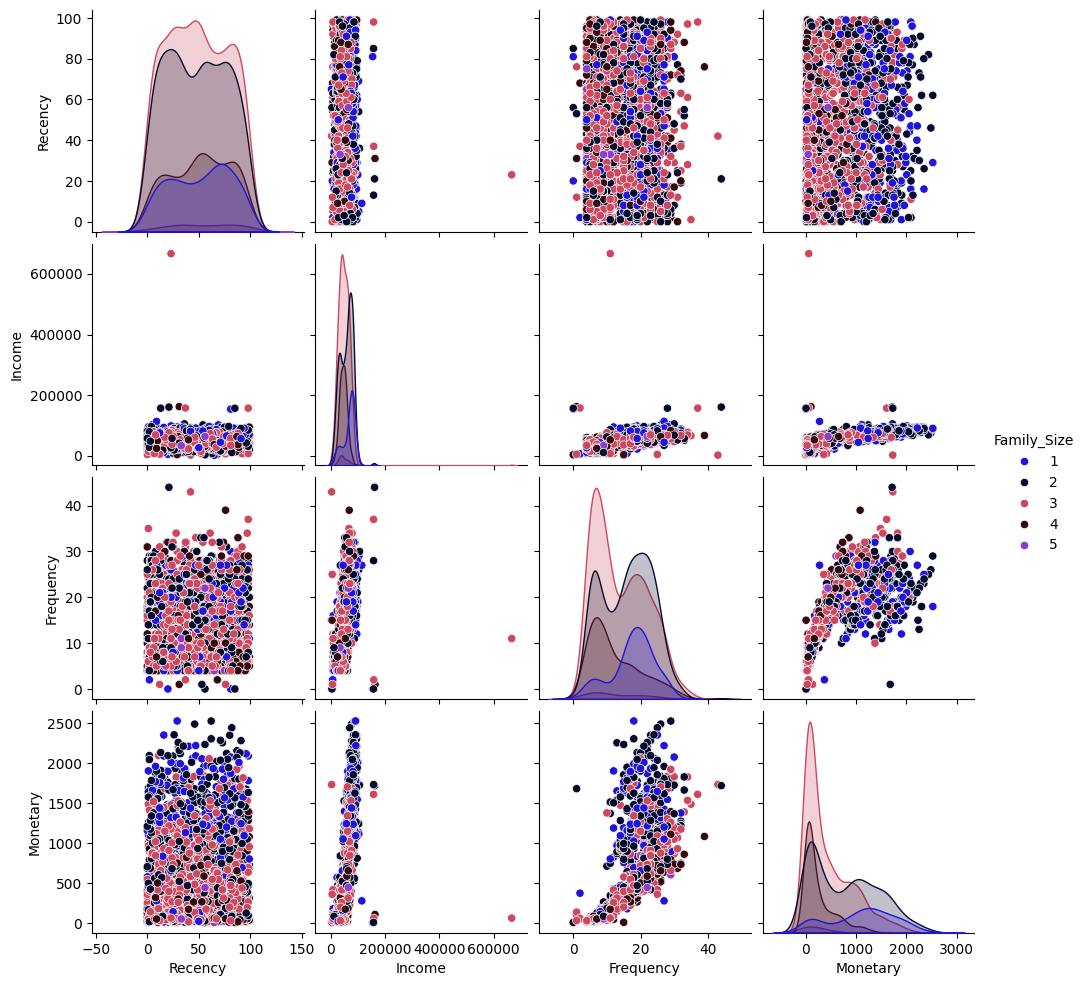

In [18]:

To_Plot = ["Recency","Income", "Frequency", "Monetary", "Family_Size"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue="Family_Size", palette= (["#2014DA","#050B2C","#CD485E","#350910","#8C3DCB"]))
plt.show()

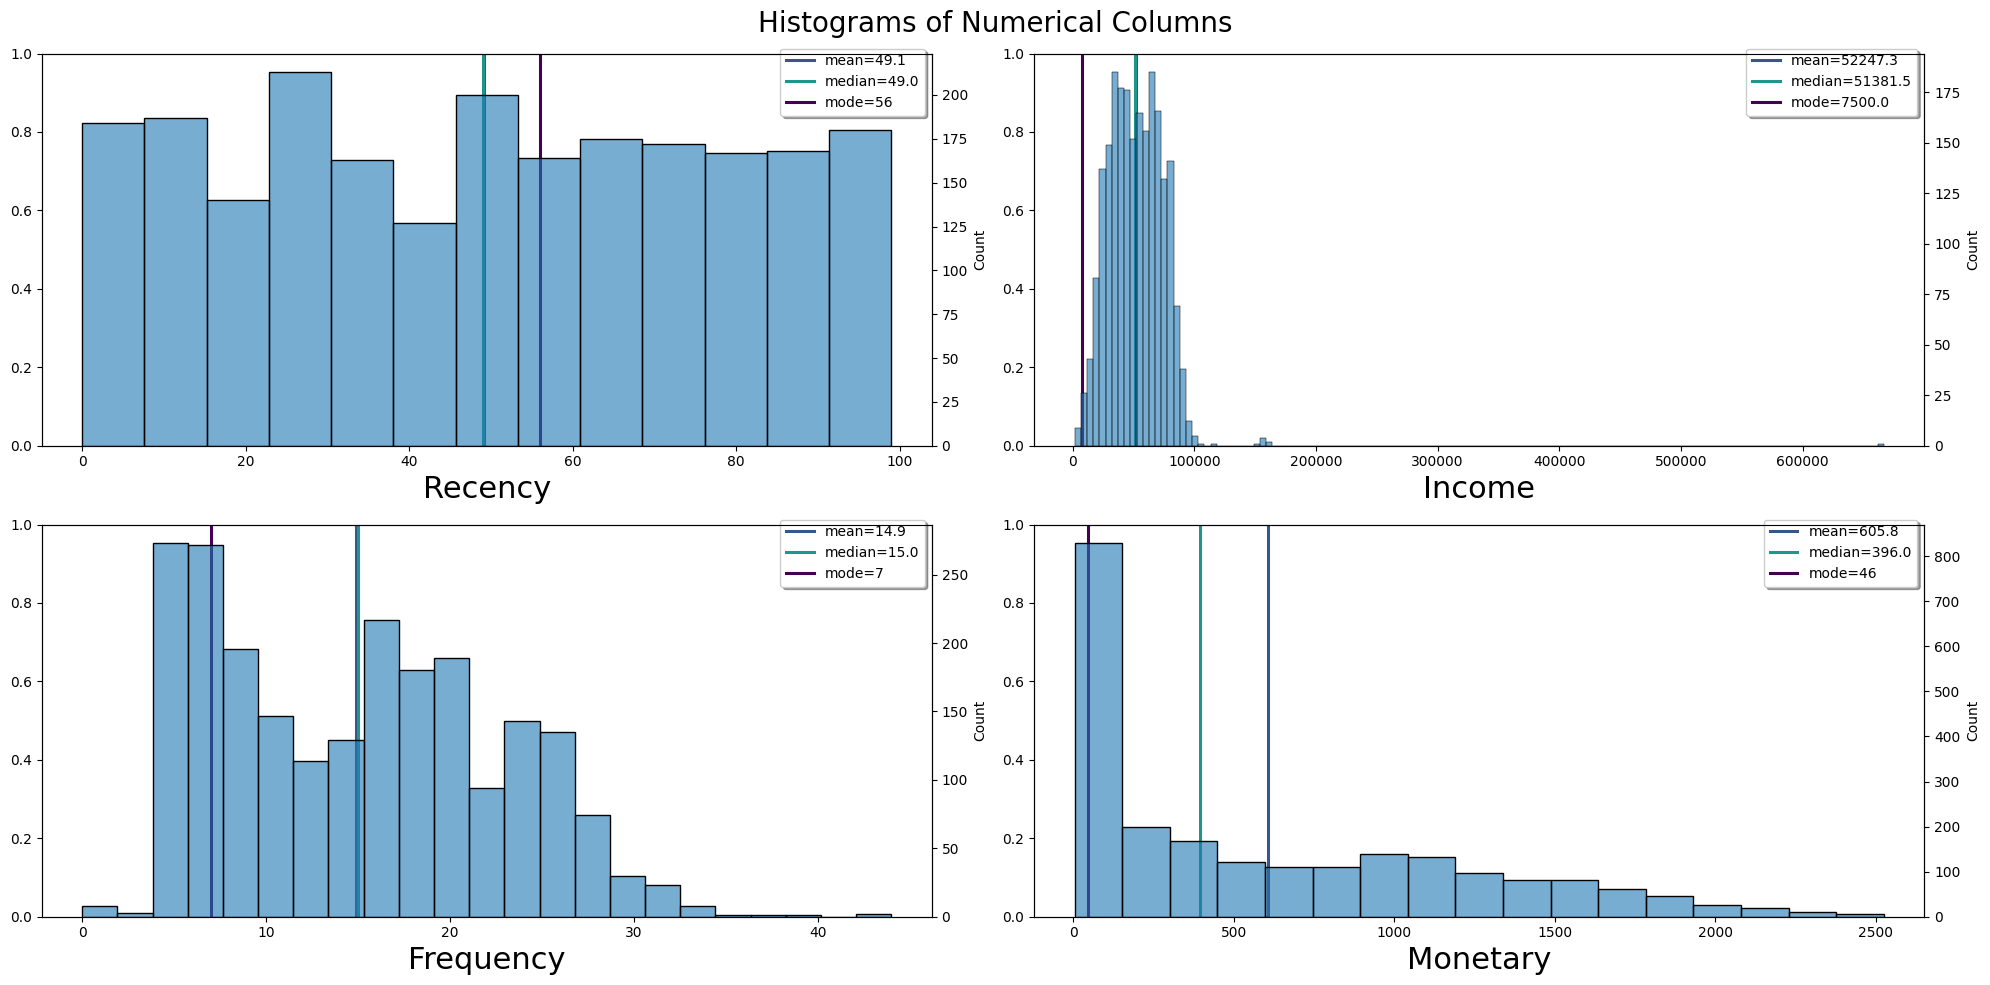

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(2):
    for j in range(2):
        if i * 2 + j < len(To_Plot):
            col = data[To_Plot].columns[i * 2 + j]
            hist_ax = ax[i][j].twinx()
            sns.histplot(x=col, data=data, ax=hist_ax, alpha=.6)
            ax[i][j].set_xlabel(col.replace('_', ' ').title(), fontsize=22, loc='center')
            ax[i][j].axvline(data[col].mean(), color='#39568CFF', linewidth=2.2,
                             label='mean=' + str(np.round(data[col].mean(), 1)))
            ax[i][j].axvline(data[col].median(), color='#1F968BFF', linewidth=2.2,
                             label='median=' + str(np.round(data[col].median(), 1)))
            ax[i][j].axvline(data[col].mode()[0], color='#440154FF', linewidth=2.2,
                             label='mode=' + str(data[col].mode()[0]))
            ax[i][j].legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=10, fancybox=True, shadow=True, frameon=True)

        else:
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()


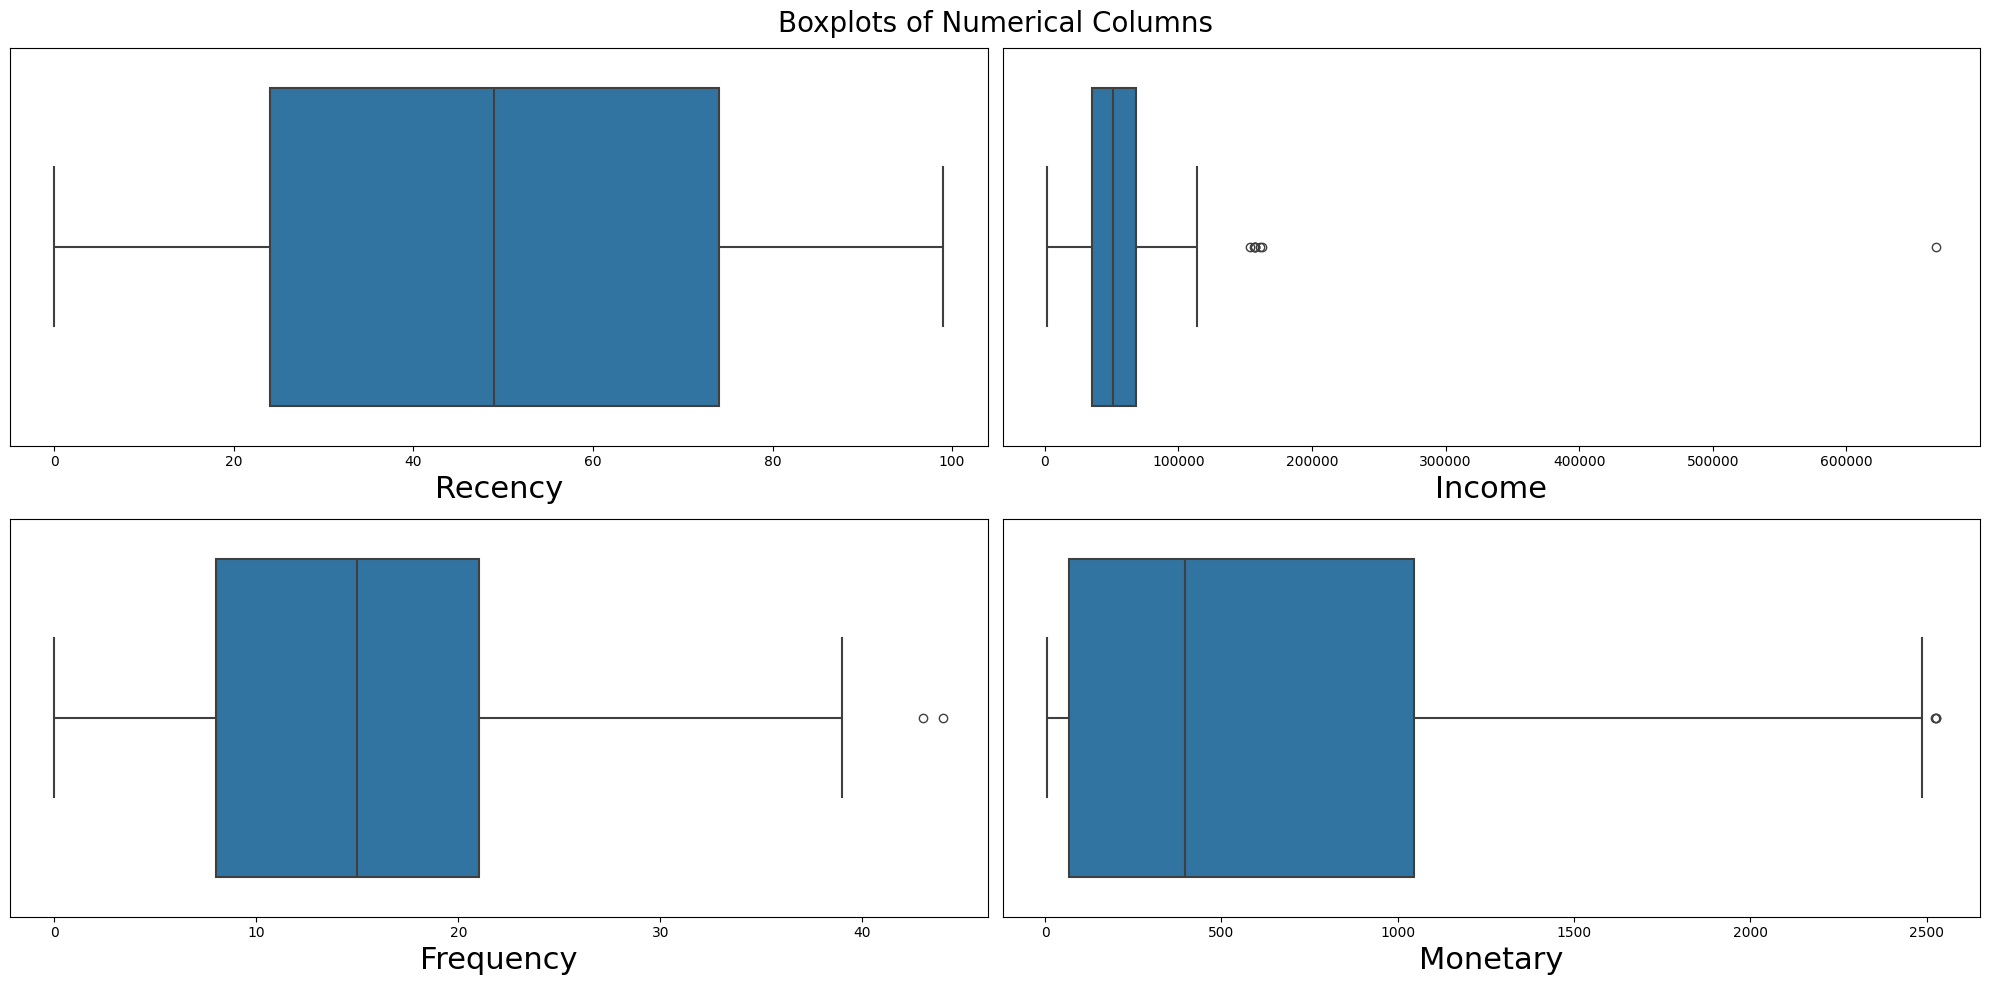

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Boxplots of Numerical Columns', fontsize=20)
for i in range(2):
    for j in range(2):
        if i * 2 + j < len(To_Plot):
            col = data[To_Plot].columns[i * 2 + j]
            sns.boxplot(x=col, data=data, ax=ax[i][j], linewidth=1.5)
            ax[i][j].set_xlabel(None)
            ax[i][j].set(yticks=[])
            ax[i][j].set_xlabel(col.replace('_', ' ').title(), fontsize=22, loc='center')
        else:
            ax[i][j].axis('off')
            
plt.tight_layout()
plt.show()

# RFM
Recency: refers to the newness of the customer. (Date of analysis - Date of last purchase by the customer)

Frequency: is the total purchase value made by the customer.

Monetary: It is the total money left by the customer as a result of the total purchases he made.

In [21]:
rfm = df[["ID","Recency","Frequency","Monetary"]]

In [22]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
Frequency,2240.0,14.862054,7.677173,0.0,8.00,15.0,21.00,44.0
Monetary,2240.0,605.798214,602.249288,5.0,68.75,396.0,1045.50,2525.0


In [23]:
rfm = rfm[rfm["Frequency"] > 0]
rfm = rfm[rfm["Recency"] > 0]

In [24]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2208.0,5590.382246,3238.785068,0.0,2834.75,5468.0,8416.50,11191.0
Recency,2208.0,49.711504,28.610767,1.0,25.00,50.0,74.00,99.0
Frequency,2208.0,14.886322,7.654835,1.0,8.00,15.0,21.00,44.0
Monetary,2208.0,608.859601,604.086385,8.0,68.00,397.5,1048.25,2525.0


In [25]:
rfm.shape

(2208, 4)

In [26]:
rfm["Recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["Frequency_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["Monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [27]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2208.0,5590.382246,3238.785068,0.0,2834.75,5468.0,8416.50,11191.0
Recency,2208.0,49.711504,28.610767,1.0,25.00,50.0,74.00,99.0
Frequency,2208.0,14.886322,7.654835,1.0,8.00,15.0,21.00,44.0
Monetary,2208.0,608.859601,604.086385,8.0,68.00,397.5,1048.25,2525.0


In [28]:
rfm["RFM_SCORE"] = (rfm['Recency_score'].astype(str) + rfm['Frequency_score'].astype(str))
rfm

,ID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE
0,5524,58,25,1617,3,5,5,35
1,2174,38,6,27,4,1,1,41
2,4141,26,21,776,4,4,4,44
3,6182,26,8,53,4,2,1,42
4,5324,94,19,422,1,4,3,14
...,...,...,...,...,...,...,...,...
2235,10870,46,18,1341,3,4,5,34
2236,4001,56,22,444,3,5,3,35
2237,7270,91,19,1241,1,4,5,14
2238,8235,8,23,843,5,5,4,55


In [29]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [30]:

rfm['Segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm


,ID,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RFM_SCORE,Segment
0,5524,58,25,1617,3,5,5,35,loyal_customers
1,2174,38,6,27,4,1,1,41,promising
2,4141,26,21,776,4,4,4,44,loyal_customers
3,6182,26,8,53,4,2,1,42,potential_loyalists
4,5324,94,19,422,1,4,3,14,at_Risk
...,...,...,...,...,...,...,...,...,...
2235,10870,46,18,1341,3,4,5,34,loyal_customers
2236,4001,56,22,444,3,5,3,35,loyal_customers
2237,7270,91,19,1241,1,4,5,14,at_Risk
2238,8235,8,23,843,5,5,4,55,champions


About_to_sleep : Encourage customers in this segment to re-engage by implementing stimulating campaigns. Special offers, discounts, or loyalty programs could be utilized to regain their interest.(Khuyến khích khách hàng ở phân khúc này tương tác lại bằng cách triển khai các chiến dịch kích thích. Các ưu đãi đặc biệt, giảm giá hoặc chương trình khách hàng thân thiết có thể được sử dụng để lấy lại sự quan tâm của họ.)

At_risk : Since customers in this segment are at risk of attrition, special offers or discounts can be provided to win them back. Additionally, personalized services can be offered to enhance customer satisfaction.(Vì khách hàng trong phân khúc này có nguy cơ bị hao hụt nên có thể đưa ra các ưu đãi hoặc giảm giá đặc biệt để thu hút họ trở lại. Ngoài ra, các dịch vụ được cá nhân hóa có thể được cung cấp để nâng cao sự hài lòng của khách hàng.)

3.Cant_loose : Customers in this segment may have demonstrated loyalty. Thus, you can strengthen their loyalty by offering loyalty programs or special privileges to reward them for their commitment.(Khách hàng trong phân khúc này có thể đã thể hiện lòng trung thành. Do đó, bạn có thể củng cố lòng trung thành của họ bằng cách cung cấp các chương trình khách hàng thân thiết hoặc các đặc quyền đặc biệt để thưởng cho sự cam kết của họ.)

Champions : Customer loyalty is high in this segment. Retain their loyalty by offering special deals or loyalty programs. Additionally, consider their feedback to improve your products or services.(Mức độ trung thành của khách hàng ở phân khúc này rất cao. Giữ lòng trung thành của họ bằng cách cung cấp các ưu đãi đặc biệt hoặc các chương trình khách hàng thân thiết. Ngoài ra, hãy xem xét phản hồi của họ để cải thiện sản phẩm hoặc dịch vụ của bạn.)

Hibernating : Implement stimulating campaigns to regain the interest of customers in this segment. Strategies such as sending personalized offers or reminders could be utilized.(Triển khai các chiến dịch kích cầu nhằm lấy lại sự quan tâm của khách hàng đối với phân khúc này. Có thể sử dụng các chiến lược như gửi lời đề nghị hoặc lời nhắc được cá nhân hóa.)

Loyal_customers : Customers in this segment exhibit high loyalty. Offer them exclusive deals or privileges to strengthen their commitment. Additionally, gather their recommendations and feedback to enhance service quality.(Khách hàng ở phân khúc này thể hiện mức độ trung thành cao. Cung cấp cho họ những ưu đãi hoặc đặc quyền độc quyền để củng cố cam kết của họ. Ngoài ra, thu thập các đề xuất và phản hồi của họ để nâng cao chất lượng dịch vụ.)

Need_attention : Attract the attention of customers in this segment by providing personalized offers or services. Ensuring excellent customer support is vital to enhance customer satisfaction.(Thu hút sự chú ý của khách hàng trong phân khúc này bằng cách cung cấp các ưu đãi hoặc dịch vụ được cá nhân hóa. Đảm bảo hỗ trợ khách hàng tuyệt vời là rất quan trọng để nâng cao sự hài lòng của khách hàng.)

New_customers : Welcome these customers with welcome offers or discounts to establish their loyalty. Additionally, gather their feedback to improve your products or services.(Chào mừng những khách hàng này bằng các ưu đãi hoặc giảm giá chào mừng để thiết lập lòng trung thành của họ. Ngoài ra, hãy thu thập phản hồi của họ để cải thiện sản phẩm hoặc dịch vụ của bạn.)

Potential_loyalist : Offer personalized deals or exclusive privileges to enhance the loyalty of customers in this segment. Regular interaction is crucial to increase brand awareness.(Cung cấp các ưu đãi được cá nhân hóa hoặc các đặc quyền độc quyền để nâng cao lòng trung thành của khách hàng trong phân khúc này. Tương tác thường xuyên là rất quan trọng để nâng cao nhận thức về thương hiệu.)

Promising : Attract the interest of customers in this segment by implementing special offers or campaigns. Providing a good customer experience is essential to enhance customer satisfaction.( Thu hút sự quan tâm của khách hàng ở phân khúc này bằng cách triển khai các ưu đãi hoặc chiến dịch đặc biệt. Cung cấp trải nghiệm khách hàng tốt là điều cần thiết để nâng cao sự hài lòng của khách hàng.)

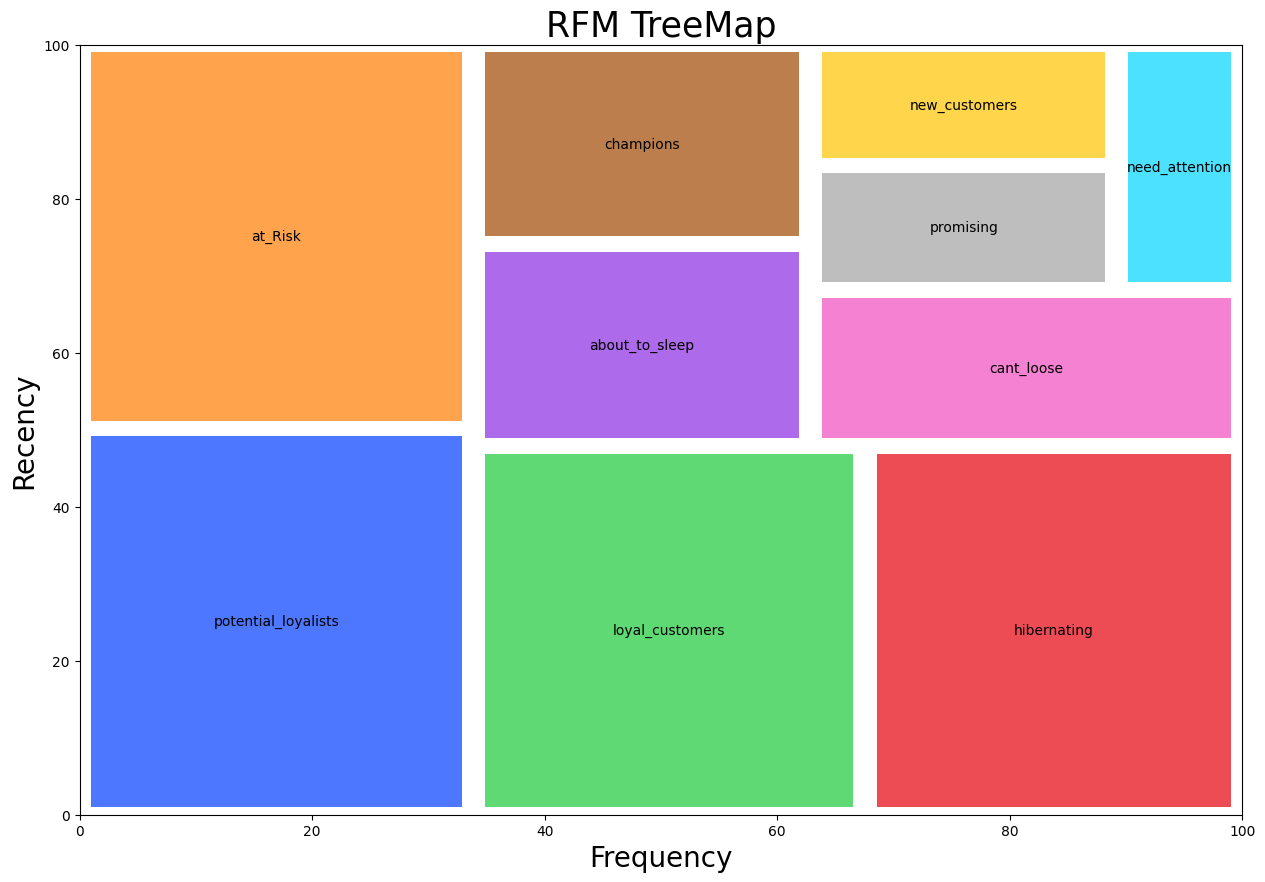

In [42]:
import squarify

df_treemap = pd.DataFrame(rfm)
segmentsx = rfm["Segment"].value_counts().sort_values(ascending=False)
segmentsx
plt.figure(figsize=(15,10))
squarify.plot(sizes=segmentsx,label=segmentsx.index,color=sns.color_palette("bright"),pad=True,bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':10})
plt.title("RFM TreeMap",fontsize=25)
plt.xlabel('Frequency', fontsize=20)
plt.ylabel('Recency', fontsize=20)
plt.show()